<a href="https://www.kaggle.com/code/hastishahhosseini/usa-real-estate-price-regression?scriptVersionId=209756435" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Real State Problem

In exploring the quintessential American dream, one theme shines brightly: homeownership. For many, this milestone represents not just a financial achievement but a significant marker in life's journey. However, the path to acquiring a suitable home is riddled with challenges, with housing prices standing out as a crucial factor.

This project aims to create a practical tool for estimating house prices using readily available information. While acknowledging that numerous variables influence prices, our goal is to provide a starting point for homebuyers in their price negotiation process.

The project comprises three key stages:
1. Data Processing and Cleaning
2. Feature Engineering
3. Development of Regression Models

# Overview of Dataset

## Description
This project leverages a CSV dataset sourced from real estate listings across various regions in the United States. The dataset encompasses 10 columns showcasing:

- **Status**: Indicates if the house is for sale or ready for construction.
- **Bed**: Denotes the number of bedrooms in the house.
- **Bath**: Specifies the count of bathrooms in the house.
- **Acre_lot**: Reflects the size of the property/land in acres.
- **City**: Specifies the city where the house is located.
- **State**: Indicates the state where the house is situated.
- **Zip_code**: Represents the postal code of the area.
- **House_size**: Indicates the size of the house in square feet.
- **Prev_sold_date**: If the house was recently sold, this column notes the previous sale date.
- **Price**: Represents the house price, including current listing price or recently sold price.

## Acknowledgements
The dataset was sourced from [realtor.com](https://www.realtor.com/) and our heartfelt gratitude goes to [Ahmed Shahriar Sakib](https://www.kaggle.com/ahmedshahriarsakib) for meticulously curating and maintaining this dataset on Kaggle.

For more comprehensive insights into the dataset, refer to the [USA Real Estate Dataset](https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset).

# Data Processing and Cleaning


### Knowing the data

This block of code aims to import necessary libraries for data analysis and visualization. `pandas` is for data manipulation, `numpy` for numerical operations, `seaborn` for statistical data visualization, and `matplotlib.pyplot` for creating plots and graphs.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv


In [2]:
import pandas as pd  # Importing the pandas library and aliasing it as pd
import numpy as np  # Importing the numpy library and aliasing it as np
import seaborn as sns  # Importing the seaborn library and aliasing it as sns
import matplotlib.pyplot as plt  # Importing the matplotlib.pyplot module and aliasing it as plt


This code block loads a dataset from a CSV file located at the specified file path and stores it in the variable `real_estate_data`. It then displays the first 10 rows of this dataset to provide a preview of its contents.

In [3]:
# Load the dataset from the specified file path and assign it to the variable real_estate_data
real_estate_data = pd.read_csv("/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv")
# Display the first 10 rows of the loaded dataset
real_estate_data.head(10)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN
6,1205.0,for_sale,50000.0,3.0,1.0,0.20,1298094.0,Ciales,Puerto Rico,639.0,2040.0,NaN
7,50739.0,for_sale,71600.0,3.0,2.0,0.08,1048466.0,Ponce,Puerto Rico,731.0,1050.0,NaN
8,81909.0,for_sale,100000.0,2.0,1.0,0.09,734904.0,Ponce,Puerto Rico,730.0,1092.0,NaN
9,65672.0,for_sale,300000.0,5.0,3.0,7.46,1946226.0,Las Marias,Puerto Rico,670.0,5403.0,NaN



This block of code performs several tasks:
1. It converts the 'brokered_by', 'street', and 'zip_code' columns of the dataset to string type, ensuring they are treated as text.
2. It displays summary statistics such as count, mean, standard deviation, minimum, maximum, and quartiles for numeric columns in the dataset.
3. It prints information about the structure of the dataset, including data types and non-null counts for each column.
4. It checks for missing values in the dataset and prints the count of missing values for each column to identify any data gaps.

In [4]:
# Convert the 'brokered_by', 'street', and 'zip_code' columns to string type
real_estate_data['brokered_by'] = real_estate_data['brokered_by'].astype(str)
real_estate_data['street'] = real_estate_data['street'].astype(str)
real_estate_data['zip_code'] = real_estate_data['zip_code'].astype(str)

# Display summary statistics for the dataset
print(real_estate_data.describe())

# Print information about the structure of the dataset, including data types and non-null counts
print(real_estate_data.info())

# Check for missing values in the dataset and display the count of missing values for each column
print(real_estate_data.isna().sum())

              price           bed          bath      acre_lot    house_size
count  2.224841e+06  1.745065e+06  1.714611e+06  1.900793e+06  1.657898e+06
mean   5.241955e+05  3.275841e+00  2.496440e+00  1.522303e+01  2.714471e+03
std    2.138893e+06  1.567274e+00  1.652573e+00  7.628238e+02  8.081635e+05
min    0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  4.000000e+00
25%    1.650000e+05  3.000000e+00  2.000000e+00  1.500000e-01  1.300000e+03
50%    3.250000e+05  3.000000e+00  2.000000e+00  2.600000e-01  1.760000e+03
75%    5.500000e+05  4.000000e+00  3.000000e+00  9.800000e-01  2.413000e+03
max    2.147484e+09  4.730000e+02  8.300000e+02  1.000000e+05  1.040400e+09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     object 
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64


Sure, let's break down the output and analyze each part:

1. **Data Statistics:**
   - `price`: The data shows the statistics for the "price" column. It indicates that there are around 2.2 million entries in this column. The mean price is approximately $524,195, with a standard deviation of $2,138,893. The minimum price is $0, and the maximum price is $2,147,484,000.
   - `bed`: This column represents the number of bedrooms. There are about 1.7 million entries. The mean number of bedrooms is approximately 3.28, with a standard deviation of 1.57. The minimum number of bedrooms is 1, and the maximum is 473.
   - `bath`: Similar to "bed," this column represents the number of bathrooms. There are approximately 1.71 million entries. The mean number of bathrooms is around 2.5, with a standard deviation of 1.65. The minimum number of bathrooms is 1, and the maximum is 830.
   - `acre_lot`: This column represents the size of the lot in acres. There are about 1.9 million entries. The mean lot size is approximately 15.22 acres, with a standard deviation of 762.82 acres. The minimum lot size is 0 acres, and the maximum is 100,000 acres.
   - `house_size`: This column represents the size of the house in square feet. There are about 1.66 million entries. The mean house size is approximately 2,714 square feet, with a standard deviation of 808,163 square feet. The minimum house size is 4 square feet, and the maximum is 1,040,400 square feet.

2. **Data Overview:**
   - The data is stored in a Pandas DataFrame with a total of 12 columns.
   - The columns include attributes like brokered_by, status, price, bed, bath, acre_lot, street, city, state, zip_code, house_size, and prev_sold_date.
   - The DataFrame has 2,226,382 entries (rows), indexed from 0 to 2,226,381.

3. **Data Types and Memory Usage:**
   - The output shows the data types of each column in the DataFrame. Numeric data types are represented as float64, while categorical or string data types are represented as object.
   - The memory usage of the DataFrame is approximately 203.8+ MB.

4. **Missing Values:**
   - The output also indicates the count of missing values (NaN) for each column.
   - For example, the "price" column has 1541 missing values, "bed" has 481,317 missing values, "bath" has 511,771 missing values, and so on.

5. **Analysis:**
   - The data set appears to be quite large, with millions of entries, which suggests it contains a significant amount of real estate information.
   - The price range is wide, with some properties having extremely high prices, which might be outliers or could be genuinely expensive properties.
   - There are notable missing values in several columns, especially in "bed," "bath," "acre_lot," "house_size," and "prev_sold_date" columns, which could impact certain analyses or require data imputation techniques.

Overall, this output provides a comprehensive overview of the data, including statistics, data types, memory usage, and missing values, which are essential for further analysis and data cleaning tasks.


This code block performs the following tasks:
1. It replaces missing (NaN) values in the 'prev_sold_date' column of the dataset with the string "not sold before" for better representation.
2. It defines a function `calculate_nan_percentage` to calculate the percentage of NaN values in each column of the dataset.
3. It calculates the NaN percentage for each column using the defined function and creates a bar plot using seaborn to visualize the percentage of NaN values in each column.

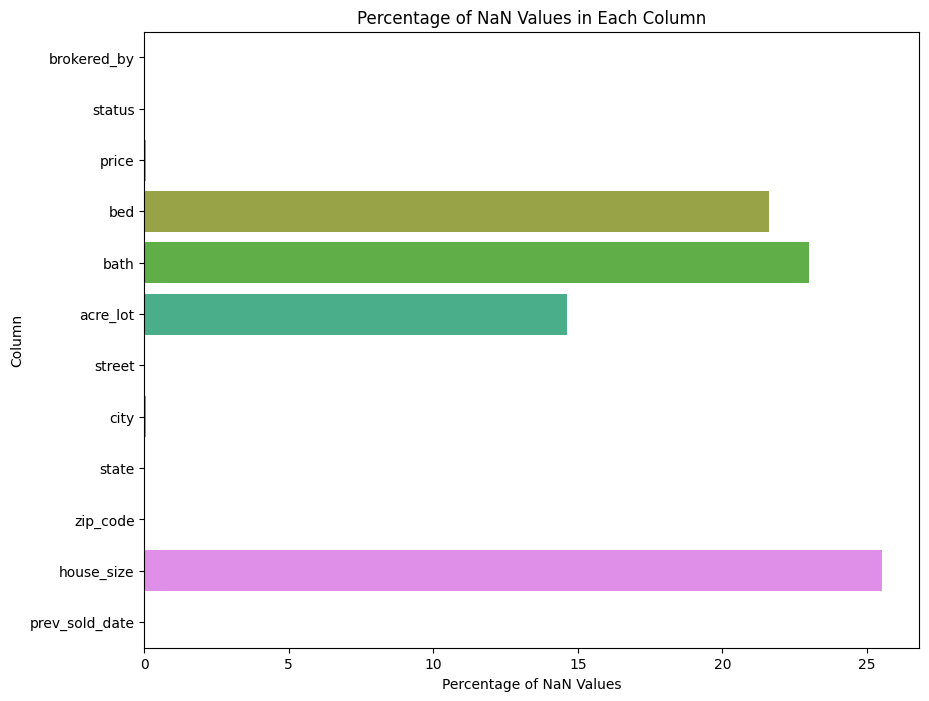

In [5]:
# Replace NaN values in the 'prev_sold_date' column with "not sold before"
real_estate_data['prev_sold_date'] = real_estate_data['prev_sold_date'].fillna("not sold before")

# Define a function to calculate the percentage of NaN values in each column
def calculate_nan_percentage(data):
    nan_percentage = data.isna().mean() * 100  # Calculate the percentage of NaN values in each column
    return nan_percentage.reset_index().rename(columns={0: 'NaN_Percentage', 'index': 'Column'})

# Calculate the NaN percentage for each column and create a bar plot to visualize it
nan_percentage = calculate_nan_percentage(real_estate_data)
plt.figure(figsize=(10, 8))  # Set the figure size for the plot
sns.barplot(data=nan_percentage, x='NaN_Percentage', y='Column')  # Create a bar plot using seaborn
plt.title('Percentage of NaN Values in Each Column')  # Set the plot title
plt.xlabel('Percentage of NaN Values')  # Set the x-axis label
plt.ylabel('Column')  # Set the y-axis label
plt.show()  # Display the plot

This code block processes the dataset to clean it by:

1. Removing rows with NaN values in the 'price' column and storing the cleaned data in `real_estate_data_clean`.
2. Removing rows with more than 2 NaN values.
3. Filling NaN values in 'house_size' with the median value of 'house_size'.
4. Calculating the average number of baths for each bed count and merging this information with the cleaned dataset.
5. Filling missing values in 'bath' with the corresponding average values.
6. Dropping the 'bath_avg' column as it's no longer needed.
7. Filling NaN values in 'bed' with the median value of 'bed'.
8. Recalculating the NaN percentages in the cleaned data and printing the results.

In [6]:
# Remove rows with NaN values in the 'price' column and store the cleaned data in real_estate_data_clean
real_estate_data_clean = real_estate_data.dropna(subset=['price'])

# Remove rows with more than 2 NaN values and update real_estate_data_clean
real_estate_data_clean = real_estate_data_clean[real_estate_data_clean.isna().sum(axis=1) < 3]

# Fill NaN values in 'house_size' with the median value of 'house_size' and update real_estate_data_clean
real_estate_data_clean['house_size'] = real_estate_data_clean['house_size'].fillna(real_estate_data_clean['house_size'].median())

# Calculate the average number of baths for each bed count and store it in avg_bath_by_bed
avg_bath_by_bed = real_estate_data_clean.groupby('bed')['bath'].mean().round(0).reset_index()
avg_bath_by_bed.columns = ['bed', 'bath_avg']  # Rename columns for clarity

# Merge the average bath data with the cleaned dataset
real_estate_data_clean = real_estate_data_clean.merge(avg_bath_by_bed, on='bed', how='left')

# Fill missing values in 'bath' with the corresponding average values from 'bath_avg'
real_estate_data_clean['bath'] = real_estate_data_clean['bath'].fillna(real_estate_data_clean['bath_avg'])

# Drop the 'bath_avg' column as it's no longer needed
real_estate_data_clean = real_estate_data_clean.drop(columns=['bath_avg'])

# Fill NaN values in 'bed' with the median value of 'bed'
real_estate_data_clean['bed'] = real_estate_data_clean['bed'].fillna(real_estate_data_clean['bed'].median())

# Recalculate the NaN percentages in the cleaned data and print the results
nan_percentage_clean = calculate_nan_percentage(real_estate_data_clean)
print(nan_percentage_clean)

            Column  NaN_Percentage
0      brokered_by        0.000000
1           status        0.000000
2            price        0.000000
3              bed        0.000000
4             bath        0.665108
5         acre_lot       17.191010
6           street        0.000000
7             city        0.021644
8            state        0.000000
9         zip_code        0.000000
10      house_size        0.000000
11  prev_sold_date        0.000000


This code block calculates the correlation matrix for numeric columns in the cleaned dataset using `np.number` to include only numerical data types. It then visualizes the correlation matrix using seaborn's heatmap function with annotations, formatting numbers to two decimal places, and using the 'coolwarm' colormap for visual representation. The resulting heatmap shows the relationships (correlations) between different numerical features in the dataset.

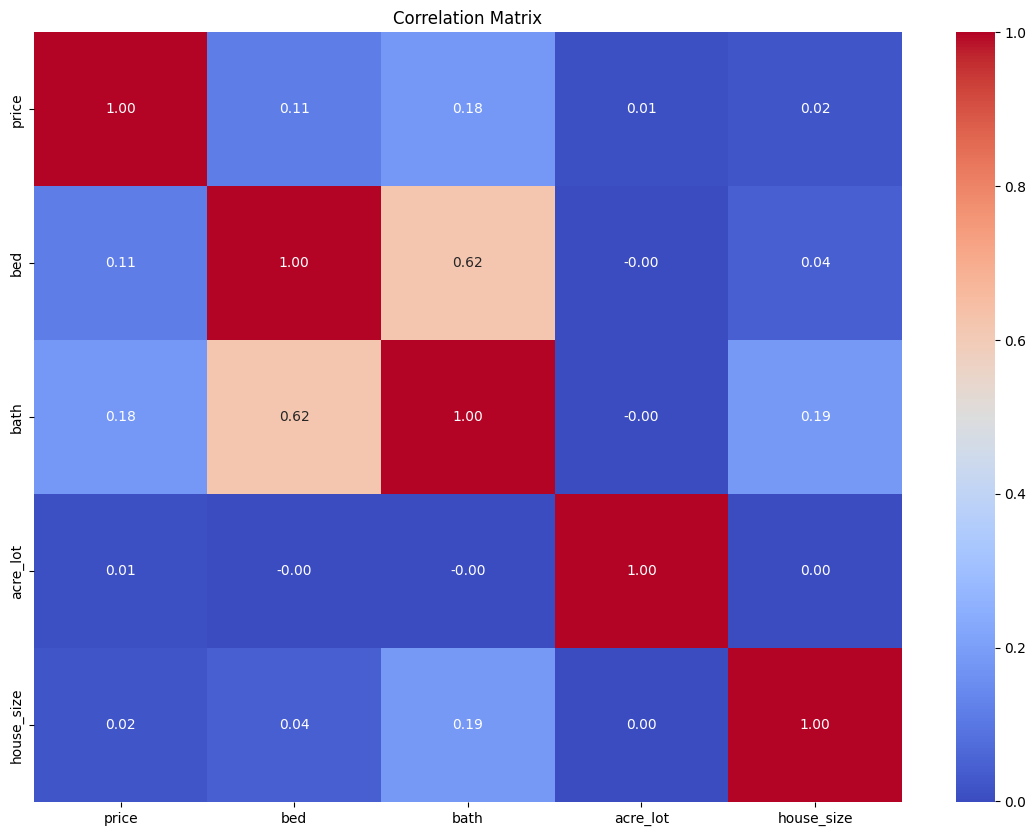

In [7]:
# Compute the correlation matrix for numeric columns in the cleaned dataset
cor_matrix = real_estate_data_clean.select_dtypes(include=[np.number]).corr()

# Visualize the correlation matrix using seaborn with annotations, formatting, and a colormap
plt.figure(figsize=(14, 10))  # Set the figure size for the heatmap
sns.heatmap(cor_matrix, annot=True, fmt='.2f', cmap='coolwarm')  # Create a heatmap with annotations, formatting, and colormap
plt.title('Correlation Matrix')  # Set the title of the plot
plt.show()  # Display the heatmap

As evidenced in the preceding analysis, a substantial correlation between our focal variable (price) and other predictor variables is not observed. It is conceivable that through meticulous data cleansing procedures and the implementation of advanced feature engineering techniques, we could augment the correlation of attributes such as property size, number of bedrooms and bathrooms. The present low correlation appears to stem from the substandard quality of the dataset, characterized by numerous missing values (NaNs) and other data anomalies. Below, we will first deal with outliers.

This code block reshapes the cleaned data into long format, excluding the 'price' column, using `pd.melt`. It then creates a figure with three subplots for each variable ('house_size', 'bed', 'bath') and loops through each variable to create a box plot for visualization. The subplots are organized horizontally (`ncols=3`) for better comparison. The box plots display the distribution of values for each numerical variable, providing insights into their spread and potential outliers.

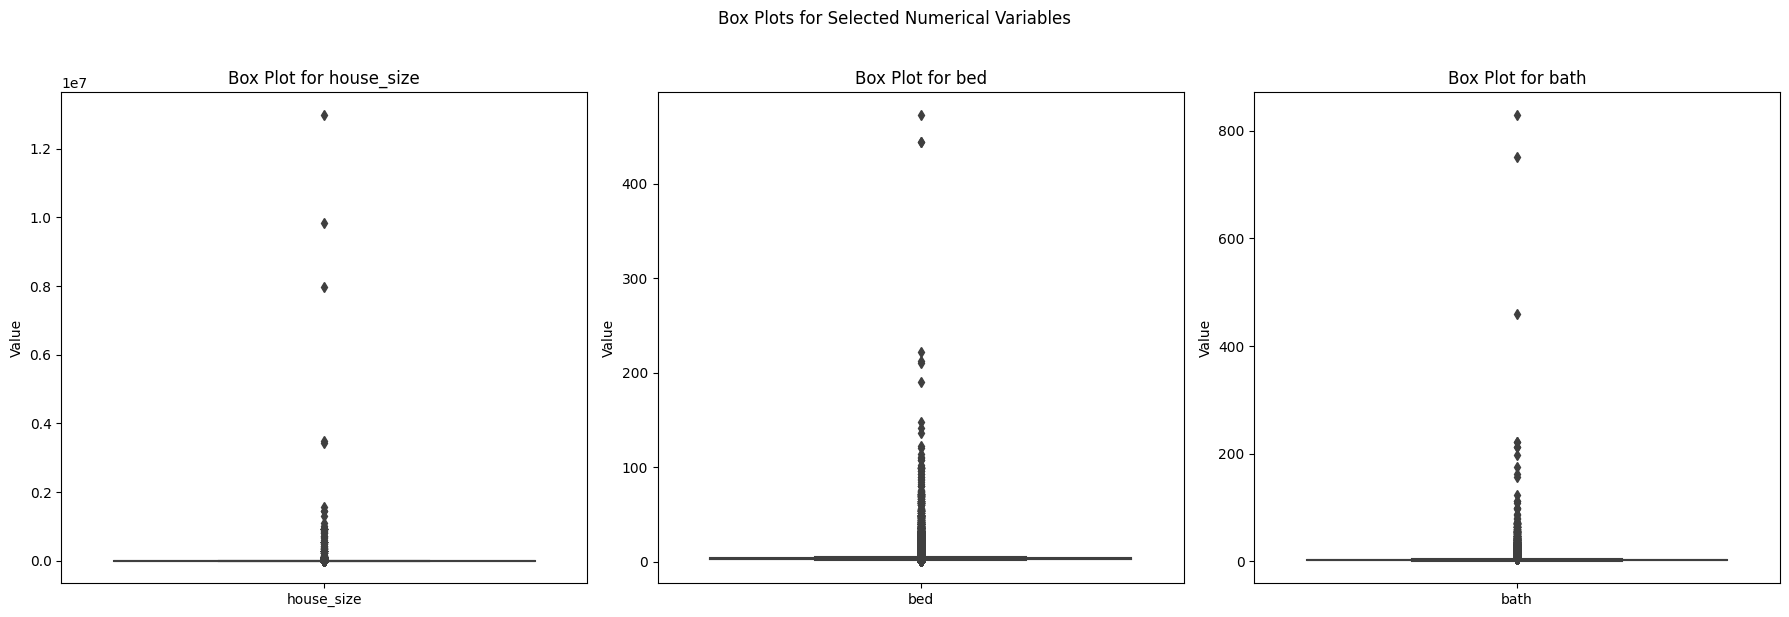

In [8]:
# Reshape the cleaned data to long format, excluding the 'price' column
long_data = pd.melt(real_estate_data_clean, id_vars=['price'], value_vars=['house_size', 'bed', 'bath'])

# Create a figure with subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Set up a figure with 3 subplots

# List of variables to plot
variables = ['house_size', 'bed', 'bath']

# Loop through each variable and create a box plot
for ax, var in zip(axes, variables):
    sns.boxplot(x='variable', y='value', data=long_data[long_data['variable'] == var], ax=ax)  # Create a box plot
    ax.set_title(f'Box Plot for {var}')  # Set the subplot title
    ax.set_xlabel('')  # Set the x-axis label to empty as it's clear from the variable
    ax.set_ylabel('Value')  # Set the y-axis label
    ax.tick_params(axis='x')  # Adjust tick parameters for the x-axis

# Set a super title for the entire figure
fig.suptitle('Box Plots for Selected Numerical Variables', y=1.02)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

We observe significant outliers within our most promising features, namely house size, number of bedrooms, and number of bathrooms. Addressing these outliers is essential to ensure the robustness and reliability of our analyses.

This code block performs two operations:

1. It removes rows with NaN values in the 'price' column from the cleaned dataset, ensuring data integrity.
2. It filters out outliers from the dataset based on specified quantiles for 'house_size', 'bed', 'bath', and 'price'. This step helps in removing extreme values that may skew the analysis or visualization.

In [9]:
# Remove rows with NaN values in the 'price' column from the cleaned data
real_estate_data_final = real_estate_data_clean.dropna(subset=['price'])

# Filter out outliers based on specified quantiles for 'house_size', 'bed', 'bath', and 'price'
real_estate_data_final = real_estate_data_final[
    (real_estate_data_final['house_size'] > real_estate_data_final['house_size'].quantile(0.001)) &
    (real_estate_data_final['house_size'] < real_estate_data_final['house_size'].quantile(0.99)) &
    (real_estate_data_final['bed'] > 0) &
    (real_estate_data_final['bed'] < real_estate_data_final['bed'].quantile(0.99)) &
    (real_estate_data_final['bath'] > 0) &
    (real_estate_data_final['bath'] < real_estate_data_final['bath'].quantile(0.99)) &
    (real_estate_data_final['price'] > real_estate_data_final['price'].quantile(0.001)) &
    (real_estate_data_final['price'] < real_estate_data_final['price'].quantile(0.9))
]

Another noteworthy observation pertained to the presence of multiple instances representing New York, necessitating a consolidation into a unified category to avoid redundancy and ensure consistency in our data analysis.


This code block replaces instances of "New York" and "New York City" with "New York City" in the 'city' column of the `real_estate_data_final` DataFrame. It then displays the first few rows where the 'city' is "New York City" to verify that the changes were applied correctly.

In [10]:
# Replace instances of "New York" and "New York City" with "New York City" in the 'city' column
real_estate_data_final['city'] = real_estate_data_final['city'].replace(["New York", "New York City"], "New York City")

# View the first few rows where 'city' is "New York City" to check the changes
real_estate_data_final[real_estate_data_final['city'] == "New York City"].head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
35467,29034.0,for_sale,210000.0,1.0,1.0,NaN,1438575.0,New York City,New York,10471.0,1760.0,not sold before
35468,29034.0,for_sale,775000.0,1.0,2.0,NaN,1314541.0,New York City,New York,10022.0,1760.0,not sold before
35471,8514.0,for_sale,749000.0,1.0,1.0,NaN,680528.0,New York City,New York,10128.0,1760.0,not sold before
35472,29034.0,for_sale,899000.0,1.0,2.0,NaN,78222.0,New York City,New York,10023.0,1760.0,not sold before
35476,92928.0,for_sale,395000.0,3.0,1.0,0.29,1213769.0,New York City,New York,10022.0,650.0,not sold before



This code block creates three summary tables based on different groupings:

1. `state_summary`: Counts the number of rows, calculates the sum of prices, and computes the average price for each state with at least 40,000 rows.
2. `city_summary`: Counts the number of rows, calculates the sum of prices, and computes the average price for each city-state combination, excluding rows with empty city or state values.
3. `street_summary`: Counts the number of rows, calculates the sum of prices, and computes the average price for each unique street in the dataset.

In [11]:
# Create a table for the count of rows, sum of price, and average price for each state with at least 40,000 rows
state_summary = real_estate_data_final.groupby('state').agg(
    count_rows=('price', 'size'),
    sum_price=('price', 'sum'),
    avg_price=('price', 'mean')
).reset_index()

state_summary = state_summary[state_summary['count_rows'] > 40000]  # Filter states with less than 40,000 rows

# Create a table for the count of rows, sum of price, and average price for each city with non-empty city and state
city_summary = real_estate_data_final.groupby(['city', 'state']).agg(
    count_rows=('price', 'size'),
    sum_price=('price', 'sum'),
    avg_price=('price', 'mean')
).reset_index()

city_summary = city_summary[(city_summary['city'] != "") & (city_summary['state'] != "")]  # Filter out empty city and state

# Create a table for the count of rows, sum of price, and average price for each street
street_summary = real_estate_data_final.groupby('street').agg(
    count_rows=('price', 'size'),
    sum_price=('price', 'sum'),
    avg_price=('price', 'mean')
).reset_index()

This code block performs the following tasks:

1. Merges only the 'avg_price' column from `state_summary` with the main data frame (`real_estate_data_final`) based on the 'state' column.
2. Merges only the 'avg_price' column from `city_summary` with the main data frame based on the 'city' and 'state' columns.
3. Merges only the 'avg_price' column from `street_summary` with the main data frame based on the 'street' column.
4. Filters out states from `state_summary` where the 'count_rows' is greater than 20,000 and stores them in `filtered_states`.
5. Filters rows in the main data frame where the 'state' is in `filtered_states`, keeping only data related to those filtered states.

In [12]:
# Merge only the 'avg_price' from state_summary with the main data frame based on the 'state' column
real_estate_data_final = real_estate_data_final.merge(state_summary[['state', 'avg_price']], on='state', suffixes=('', '_state'))

# Merge only the 'avg_price' from city_summary with the main data frame based on 'city' and 'state' columns
real_estate_data_final = real_estate_data_final.merge(city_summary[['city', 'state', 'avg_price']], on=['city', 'state'], suffixes=('', '_city'))

# Merge only the 'avg_price' from street_summary with the main data frame based on the 'street' column
real_estate_data_final = real_estate_data_final.merge(street_summary[['street', 'avg_price']], on='street', suffixes=('', '_street'))

# Filter states with 'count_rows' greater than 20,000 and store them in filtered_states
filtered_states = state_summary[state_summary['count_rows'] > 20000]['state']

# Filter rows in the main data frame where the 'state' is in filtered_states
real_estate_data_final = real_estate_data_final[real_estate_data_final['state'].isin(filtered_states)]

These lines of code calculate two new features based on existing columns in the `real_estate_data_final` DataFrame:

1. `bed_bath_ratio`: Calculates the ratio of bedrooms to bathrooms by dividing the 'bed' column by the 'bath' column.
2. `size_bath_interaction`: Calculates the interaction between house size and number of bathrooms by multiplying the 'house_size' column with the 'bath' column.

In [13]:
# Calculate the ratio of bedrooms to bathrooms and store it in the 'bed_bath_ratio' column
real_estate_data_final['bed_bath_ratio'] = real_estate_data_final['bed'] / real_estate_data_final['bath']

# Calculate the interaction between house size and number of bathrooms and store it in the 'size_bath_interaction' column
real_estate_data_final['size_bath_interaction'] = real_estate_data_final['house_size'] * real_estate_data_final['bath']


This code block computes the correlation matrix for the numeric columns in the `real_estate_data_final` DataFrame using `np.number` to include only numerical data types. It then visualizes the correlation matrix using seaborn's heatmap function with annotations, formatting numbers to two decimal places, and using the 'coolwarm' colormap for visual representation. The resulting heatmap shows the relationships (correlations) between different numerical features in the cleaned dataset.

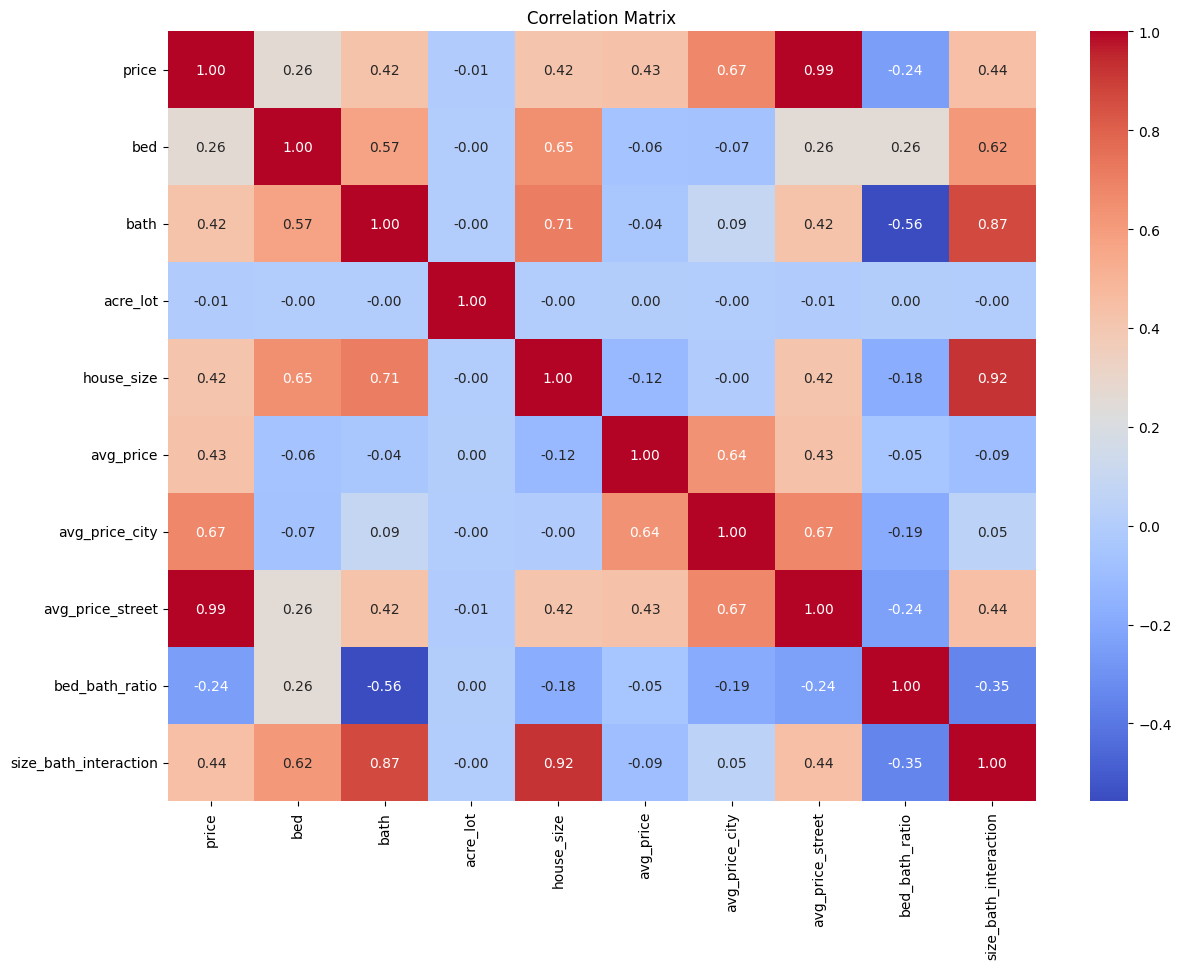

In [14]:
# Select numeric columns from the cleaned data for computing the correlation matrix
numeric_data_clean2 = real_estate_data_final.select_dtypes(include=[np.number])

# Compute the correlation matrix for the numeric columns
cor_matrix_clean2 = numeric_data_clean2.corr()

# Visualize the correlation matrix using seaborn with annotations, formatting, and a colormap
plt.figure(figsize=(14, 10))  # Set the figure size for the heatmap
sns.heatmap(cor_matrix_clean2, annot=True, fmt='.2f', cmap='coolwarm')  # Create a heatmap with annotations, formatting, and colormap
plt.title('Correlation Matrix')  # Set the title of the plot
plt.show()  # Display the heatmap

The correlation matrix depicted above demonstrates a noticeable improvement in the correlation scores of our primary features subsequent to data cleaning and preprocessing. Notably, the introduction of an interaction feature between property size and the number of bathrooms has further bolstered this correlation.

Given that variables like house size, number of bathrooms, number of bedrooms, the bedroom-to-bathroom ratio, and the size-bath interaction exhibit high correlations with each other, it is imperative to avoid multicollinearity in our model. To achieve this, we will include only the size-bath interaction, which manifests the highest correlation among these variables. Additionally, we will omit all features derived from price (as they are directly derived from it and were solely intended for analytical purposes) and columns with minimal correlation with price, such as acreage.

In [15]:
# Drop specified columns from the real_estate_data_final DataFrame
real_estate_data_final = real_estate_data_final.drop(columns=["brokered_by", "bed", "bath", "acre_lot",
                                     "street", "zip_code", "house_size", "prev_sold_date",
                                     "avg_price", "avg_price_city", "avg_price_street", "bed_bath_ratio"])

Proceeding beyond nominal values, our attention shifts to categorical features. We commence with the "status" column, which encompasses three states: "sold," "ready_to_build," and "for_sale." Given our objective, we will exclude records marked as "sold" and proceed to transform the remaining categories into dummy variables for further analysis.


In Step 1, the code removes rows from the `real_estate_data_final` DataFrame where the 'status' column has the value 'sold'.

In Step 2, the code converts the 'status' column to a dummy variable by replacing 'for_sale' with 1 and 'ready_to_build' with 0 in the 'status' column of the DataFrame. This transformation is often used to represent categorical variables as binary (0 or 1) values in machine learning models.

In [16]:
# Step 1: Remove rows where the 'status' is 'sold'
real_estate_data_final = real_estate_data_final[real_estate_data_final['status'] != 'sold']

# Step 2: Convert the 'status' column to a dummy variable
real_estate_data_final.loc[real_estate_data_final['status'] == 'for_sale', 'status'] = 1  # Replace 'for_sale' with 1
real_estate_data_final.loc[real_estate_data_final['status'] == 'ready_to_build', 'status'] = 0  # Replace 'ready_to_build' with 0

Following the creation of the new categorical feature, it is imperative to assess its correlation with the target variable, "price," to ascertain its potential predictive value and impact on our analysis.

This code block computes the correlation matrix for the selected columns ('price', 'status', 'size_bath_interaction') in the entire `real_estate_data_final` dataset. It then plots the correlation matrix using seaborn's heatmap with annotations, a 'coolwarm' colormap, and formatting numbers to two decimal places. The resulting heatmap visualizes the relationships (correlations) between these selected numerical features in the entire dataset.

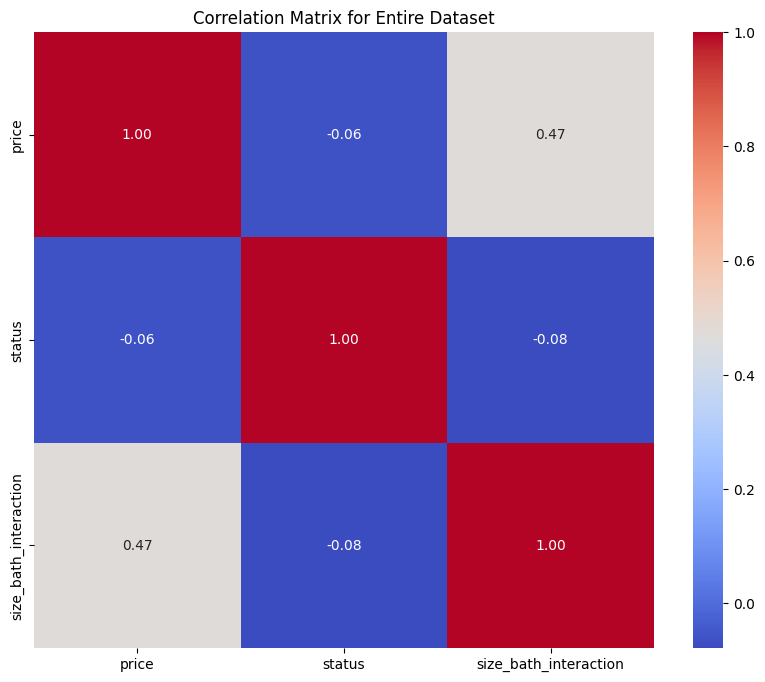

In [17]:
# Step 1: Compute the correlation matrix for the selected columns in the entire dataset
numeric_data_clean3 = real_estate_data_final[['price', 'status', 'size_bath_interaction']]
corr_matrix = numeric_data_clean3.corr()

# Plot the correlation matrix for the entire dataset using seaborn's heatmap
plt.figure(figsize=(10, 8))  # Set the figure size for the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Create a heatmap with annotations and colormap
plt.title('Correlation Matrix for Entire Dataset')  # Set the title of the plot
plt.show()  # Display the heatmap

The aforementioned analysis indicates that the newly created "status" feature does not contribute significantly to our model, as it exhibits an insignificant correlation with our target variable. Consequently, its inclusion in our model may not yield meaningful predictive value and may therefore be omitted from further consideration.

After executing the following code, the 'status' column will be removed from the DataFrame.

In [18]:
# Drop the 'status' column from the real_estate_data_final DataFrame
real_estate_data_final = real_estate_data_final.drop(columns=['status'])

To optimize our model and overcome potential constraints posed by the large volume of data, including memory limitations and processing capabilities, we propose a strategic approach. We will focus on enhancing analysis by evaluating the correlation between price and the most prominent feature within each state. This methodical selection aims to streamline data processing and prioritize the most impactful variables, thereby facilitating more meaningful analysis and model building despite resource constraints.


This code snippet will generate separate correlation matrices for each state present in your `real_estate_data_final` DataFrame and plot them as heatmaps in a grid of subplots. Each subplot will display the correlation matrix for a specific state, focusing on the relationship between 'price' and 'size_bath_interaction' within that state.

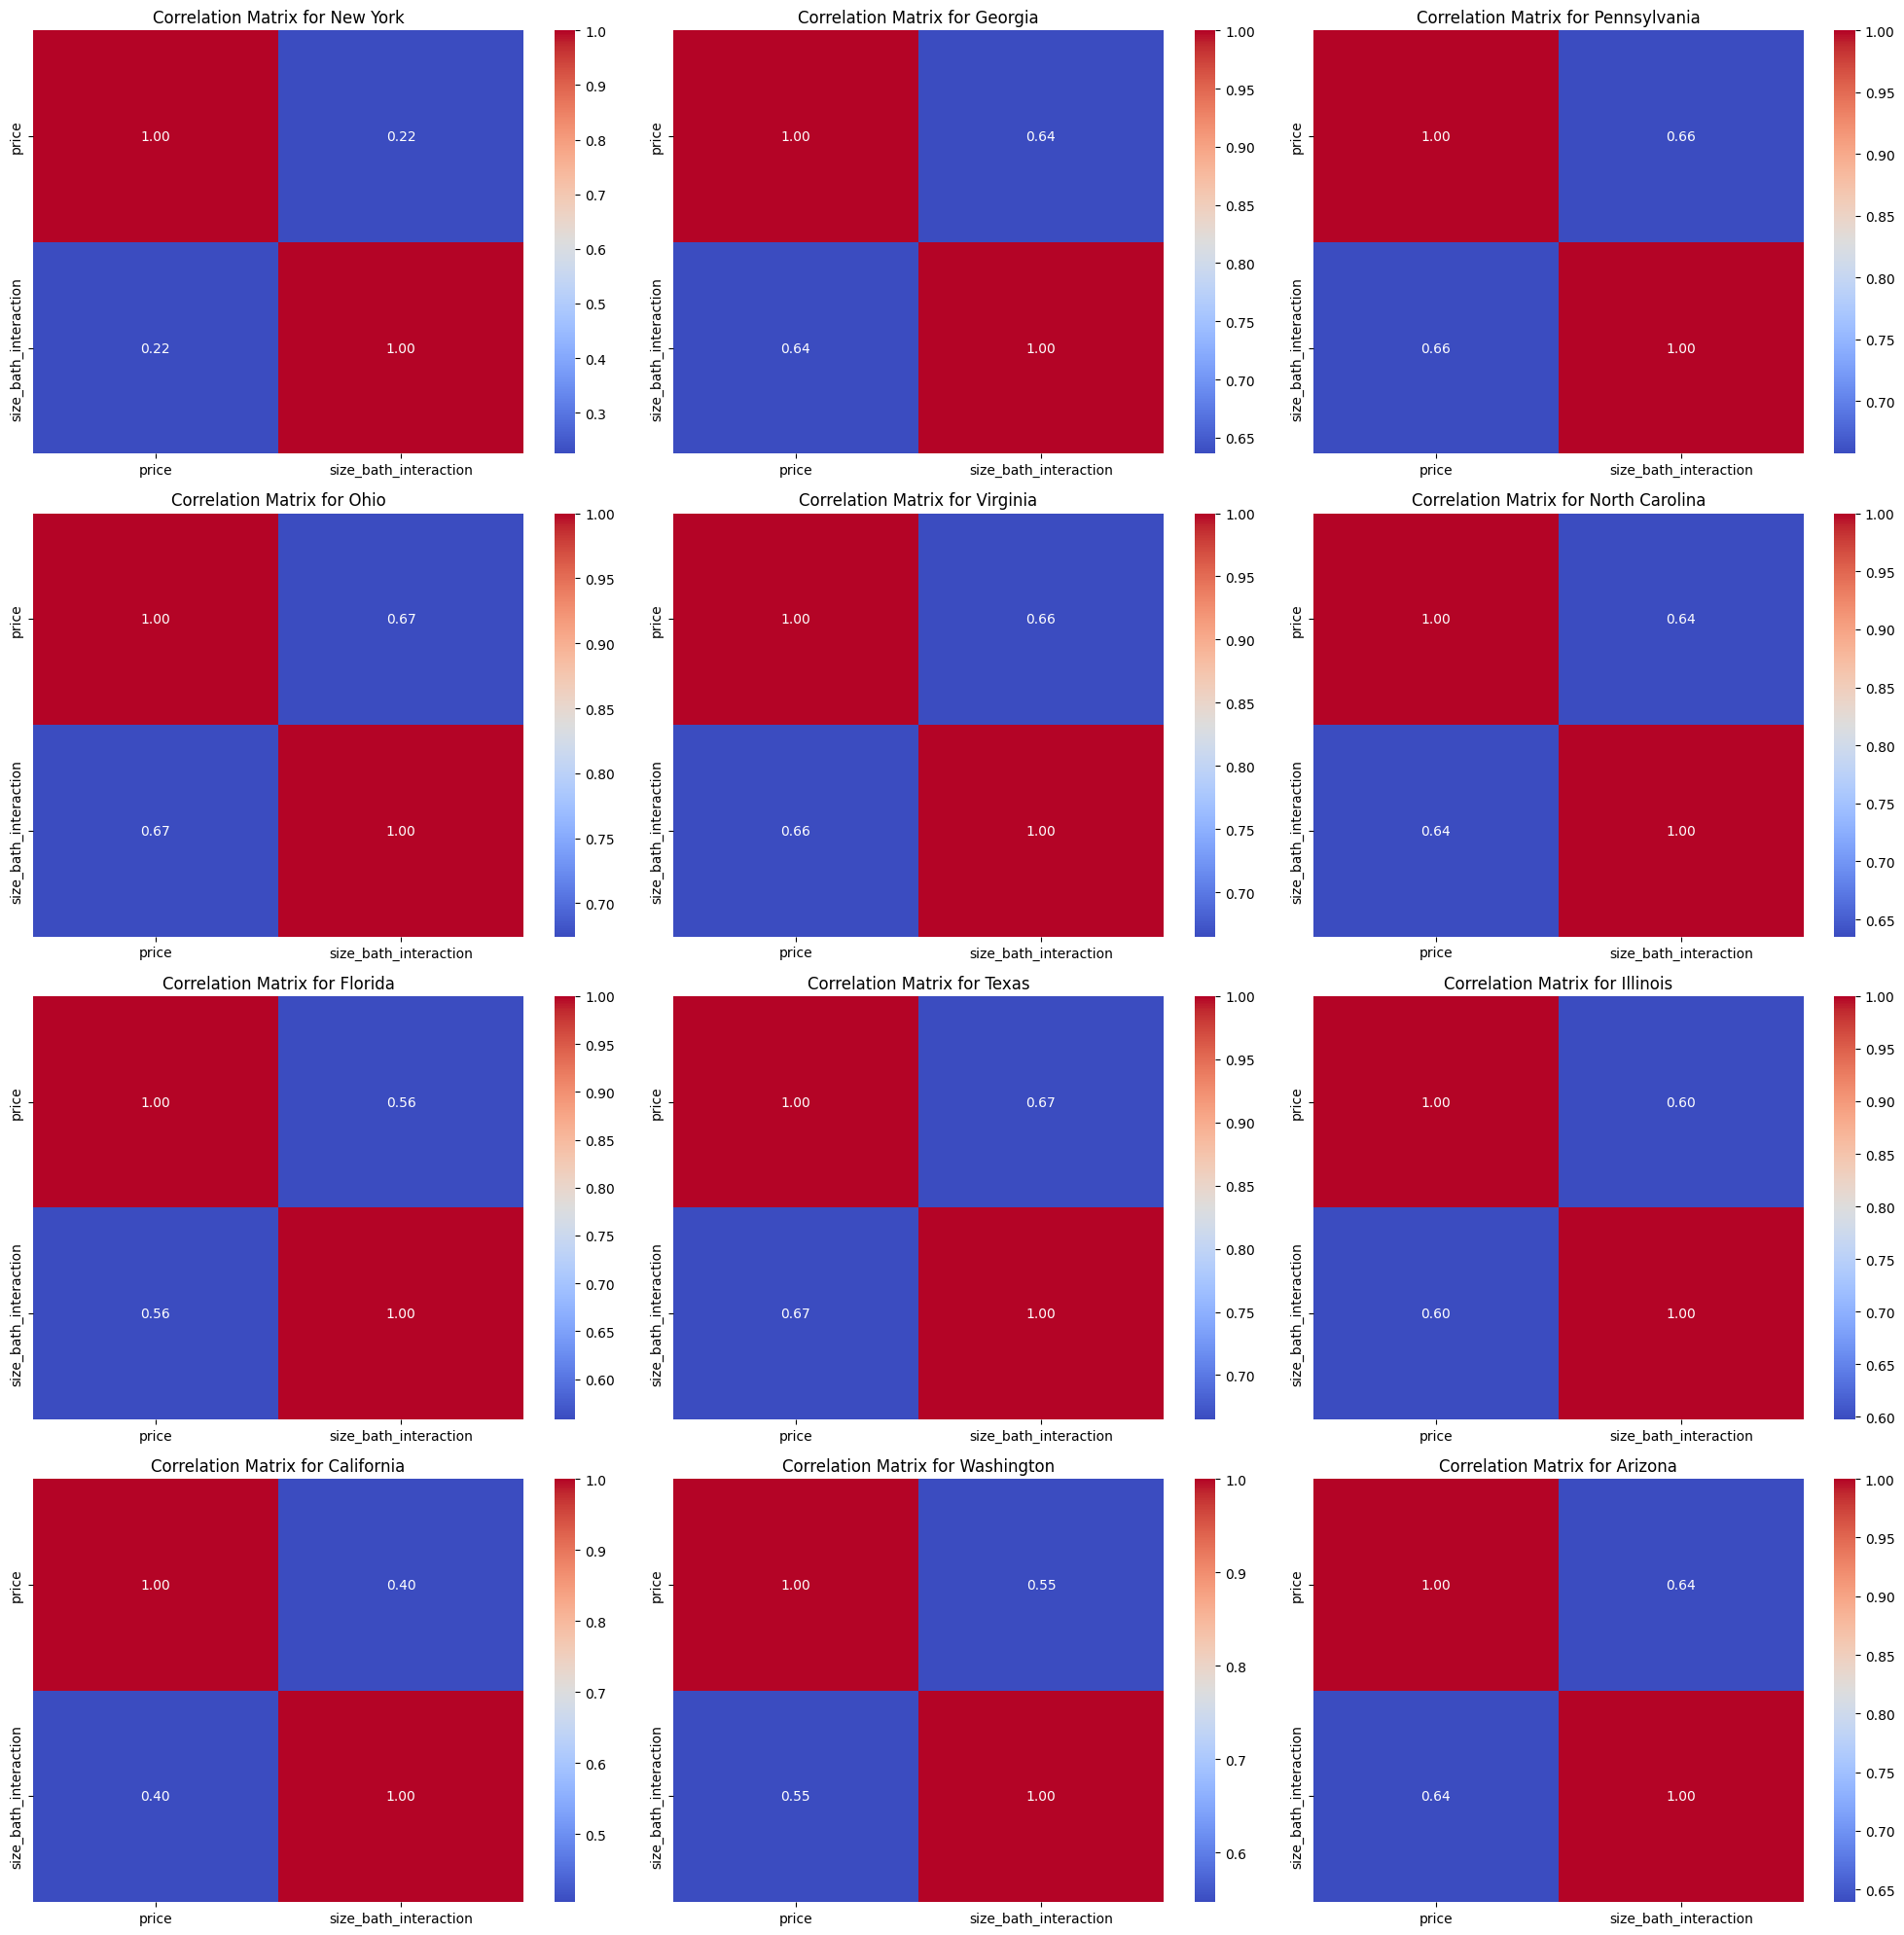

In [19]:
# Get the unique states from the 'state' column
states = real_estate_data_final['state'].unique()

# Define the grid size for subplots based on the number of unique states
n_states = len(states)
n_cols = 3
n_rows = (n_states + n_cols - 1) // n_cols

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Iterate over each state to compute and plot the correlation matrix
for i, state in enumerate(states):
    # Filter data for the current state and select relevant columns for correlation computation
    state_data = real_estate_data_final[real_estate_data_final['state'] == state][['price', 'size_bath_interaction']]
    state_corr_matrix = state_data.corr()  # Compute the correlation matrix for the current state
    
    # Select the subplot for the current state
    ax = axes[i // n_cols, i % n_cols]
    
    # Plot the correlation matrix as a heatmap
    sns.heatmap(state_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title(f'Correlation Matrix for {state}')  # Set the title for the subplot

# Remove any empty subplots if the number of unique states is less than the total number of subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plot

As demonstrated in the previous analysis, the correlation values between price and the most prominent feature vary significantly across different states, indicating disparities in data quality. In regression analysis and statistics, a correlation higher than 0.65 is typically regarded as a strong indicator of potential for further feature development. Therefore, we will retain only those states where the correlation between price and our independent variable exceeds 0.65, as these states present the most promising opportunities for enhancing our model.

Here are the steps to compute the correlation for each state, filter states based on correlation criteria, and then filter the original data to include only rows from the filtered states:

In Step 1, the code iterates through each unique state in the dataset, computes the correlation between 'price' and 'size_bath_interaction' for each state, and filters states based on a correlation threshold (in this case, a correlation value greater than 0.65).

In Step 2, the code filters the original `real_estate_data_final` DataFrame to only include rows from the filtered states, resetting the index for the filtered DataFrame for consistency.

In [20]:
# Step 1: Compute the correlation for each state and filter states
states = real_estate_data_final['state'].unique()
filtered_states = []

for state in states:
    state_data = real_estate_data_final[real_estate_data_final['state'] == state]
    if 'price' in state_data.columns and 'size_bath_interaction' in state_data.columns:
        corr_value = state_data[['price', 'size_bath_interaction']].corr().loc['price', 'size_bath_interaction']
        if corr_value > 0.65:
            filtered_states.append(state)

# Step 2: Filter the original data to only include rows from the filtered states
real_estate_data_final = real_estate_data_final[real_estate_data_final['state'].isin(filtered_states)].reset_index(drop=True)

To further refine our model, we will retain only the 20 most prominent cities within each selected state, based on their record count. Cities with a limited number of records are likely to provide insufficient data for building a reliable predictive model. By focusing on cities with a substantial number of records, we enhance the model's robustness and predictive accuracy.

Here's how you can define the number of top cities to keep, count the number of records for each city within each state, sort and select the top N cities per state, and filter the original data to include only the top N cities per state:

In Step 1, the code counts the number of records for each city within each state using `groupby` and `size`.

In Step 2, it sorts the cities by the number of records within each state in descending order and selects the top N cities per state.

In Step 3, it merges the original `real_estate_data_final` DataFrame with the top cities per state DataFrame to filter the data and include only the top N cities per state using an inner join. The resulting DataFrame `real_estate_data_final_1` contains data for only the top N cities per state.

In [21]:
# Define the number of top cities to keep
N = 20  # You can change this number as needed

# Step 1: Count the number of records for each city within each state
city_counts = real_estate_data_final.groupby(['state', 'city']).size().reset_index(name='counts')

# Step 2: Sort the cities by the number of records within each state and select top N cities
top_cities_per_state = city_counts.sort_values(by=['state', 'counts'], ascending=[True, False]).groupby('state').head(N)

# Step 3: Use merge to filter the original data to include only the top N cities per state
real_estate_final = real_estate_data_final.merge(top_cities_per_state[['state', 'city']], on=['state', 'city'], how='inner')

Now it's time to covert these states and cities to dummy variables to include in our model. Here's how you can convert the 'state' and 'city' columns to categorical type, create dummy variables for these columns, and ensure the dummy variables are 0s and 1s:

1. **Convert to Categorical**: The 'state' and 'city' columns are converted to categorical type using `astype('category')`. This is useful for the `get_dummies` function to create dummy variables.

2. **Create Dummy Variables**: Dummy variables for the 'state' and 'city' columns are created using `pd.get_dummies`, with the `drop_first=True` parameter to drop the first category to avoid multicollinearity (the situation where one variable can be linearly predicted from the others).

3. **Ensure Dummy Variables are 0s and 1s**: The `update` method ensures that the created dummy variables are integers (0s and 1s). This is done by filtering columns that start with 'state_' and 'city_', converting them to integers, and updating the `final_data` DataFrame.

The resulting `final_data` DataFrame contains the original data with 'state' and 'city' columns converted into dummy variables, ready for use in regression models or further analysis.

In [22]:
# Convert 'state' and 'city' columns to categorical type
real_estate_final.loc[:, ['state', 'city']] = real_estate_final.loc[:, ['state', 'city']].astype('category')

# Create dummy variables using pandas get_dummies
# Drop the first dummy variable for each category to avoid multicollinearity
final_data = pd.get_dummies(real_estate_final, columns=['state', 'city'], drop_first=True)

# Ensure dummy variables for 'state' and 'city' are 0s and 1s
final_data.update(final_data.filter(like='state_').astype(int))
final_data.update(final_data.filter(like='city_').astype(int))

# Display the final DataFrame
final_data

/tmp/ipykernel_18/3098492406.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  final_data.update(final_data.filter(like='state_').astype(int))
/tmp/ipykernel_18/3098492406.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  final_data.update(final_data.filter(like='state_').astype(int))
/tmp/ipykernel_18/3098492406.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  final_data.update(final_data.filter(like='state_').astype(int))
/tmp/ipykernel_18/3098492406

,price,size_bath_interaction,state_Pennsylvania,state_Texas,state_Virginia,city_Alexandria,city_Amarillo,city_Arlington,city_Ashburn,city_Austin,...,city_Virginia Beach,city_Warren,city_Washington Township,city_West Chester,city_Westerville,city_Williamsburg,city_Winchester,city_Woodbridge,city_York,city_Youngstown
0,129900.0,1050.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,259900.0,2612.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,449900.0,6321.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,245000.0,4050.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,189000.0,9546.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66061,548000.0,7872.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66062,175000.0,4563.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66063,435000.0,8706.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66064,295000.0,3650.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


That sounds like a thorough and comprehensive approach! Training various regression models like linear regression, polynomial regression, lasso regression, ridge regression, elastic net regression, random forest regression, and gradient boosting regression allows for a holistic analysis of predictive models. Comparing the results from these different models will provide valuable insights into their strengths, weaknesses, and suitability for the dataset at hand. This approach will help in identifying the most effective and accurate regression model for making predictions based on the cleaned and processed data with appropriate features.

# Regressions running

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f

# Define the features and target variable
X = final_data.drop(columns=['price'])
y = final_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store the results
results = {}

# Function to calculate adjusted R^2
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Function to calculate the F-statistic and p-value
def f_statistic_and_p_value(y_true, y_pred, k):
    n = len(y_true)
    rss = np.sum((y_true - y_pred) ** 2)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    f_stat = ((tss - rss) / k) / (rss / (n - k - 1))
    p_value = 1 - f.cdf(f_stat, k, n - k - 1)
    return f_stat, p_value

# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0),
    'Polynomial Regression (degree 2)': PolynomialFeatures(degree=2),
    'ElasticNet Regression': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'RandomForest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting Regression': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate each model
for name, model in models.items():
    if 'Polynomial' in name:
        degree = int(name.split()[-1][:-1])
        poly = PolynomialFeatures(degree=degree)
        try:
            X_poly_train = poly.fit_transform(X_train)
            X_poly_test = poly.transform(X_test)
            lin_reg = LinearRegression()
            lin_reg.fit(X_poly_train, y_train)
            y_pred = lin_reg.predict(X_poly_test)
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            n = X_test.shape[0]
            k = X_poly_test.shape[1]
            adj_r2 = adjusted_r2_score(r2, n, k)
            f_stat, p_value = f_statistic_and_p_value(y_test, y_pred, k)
            results[name] = [mse, rmse, r2, adj_r2, f_stat, p_value]
        except MemoryError:
            results[name] = ['Memory Error'] * 6
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        n = X_test.shape[0]
        k = X_test.shape[1]
        adj_r2 = adjusted_r2_score(r2, n, k)
        f_stat, p_value = f_statistic_and_p_value(y_test, y_pred, k)
        results[name] = [mse, rmse, r2, adj_r2, f_stat, p_value]

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, index=['MSE', 'RMSE', 'R^2', 'Adjusted R^2', 'F-statistic', 'p-value']).T
results_df

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.345e+14, tolerance: 1.914e+11
  model = cd_fast.enet_coordinate_descent(


,MSE,RMSE,R^2,Adjusted R^2,F-statistic,p-value
Linear Regression,1.459196e+10,120797.175099,0.590571,0.588046,233.851523,1.110223e-16
Lasso Regression,1.459195e+10,120797.142715,0.590572,0.588046,233.851736,1.110223e-16
Ridge Regression,1.459197e+10,120797.225182,0.590571,0.588046,233.851195,1.110223e-16
Polynomial Regression (degree 2),1.352650e+10,116303.469605,0.620467,0.488810,4.712763,1.110223e-16
ElasticNet Regression,1.768831e+10,132997.400944,0.503692,0.500631,164.535818,1.110223e-16
RandomForest Regression,1.539360e+10,124070.960155,0.568078,0.565414,213.230515,1.110223e-16
GradientBoosting Regression,1.432045e+10,119668.082346,0.598190,0.595711,241.358984,1.110223e-16


### Model Explanations

1. **Linear Regression**:
   Linear Regression fits a linear equation to the observed data. It models the relationship between a dependent variable and one or more independent variables by finding the line that minimizes the sum of the squared differences between the observed and predicted values.

2. **Lasso Regression**:
   Lasso (Least Absolute Shrinkage and Selection Operator) Regression is a type of linear regression that includes a penalty equal to the absolute value of the magnitude of coefficients. This penalty can shrink some coefficients to zero, effectively performing variable selection.


3. **Ridge Regression**:
   Ridge Regression is similar to linear regression but includes a penalty equal to the square of the magnitude of coefficients. This penalty term (L2) helps to mitigate multicollinearity and prevent overfitting by shrinking coefficients.


4. **Polynomial Regression (degree 2)**:
   Polynomial Regression extends linear regression by including polynomial terms (squared, cubed, etc.) of the independent variables, allowing for a nonlinear relationship between the dependent and independent variables.


5. **ElasticNet Regression**:
   ElasticNet Regression combines the penalties of Lasso and Ridge regression. It aims to retain the benefits of both models, providing variable selection (like Lasso) and coefficient shrinkage (like Ridge).


6. **RandomForest Regression**:
   RandomForest Regression is an ensemble learning method that constructs multiple decision trees during training and outputs the mean prediction of the individual trees. It reduces overfitting and improves predictive accuracy. Combines multiple decision trees, each trained on a random subset of the data, using bootstrapping and feature randomness.

7. **GradientBoosting Regression**:
   GradientBoosting Regression is another ensemble method that builds trees sequentially. Each new tree corrects the errors of the previous ones by focusing on the residual errors. It often leads to high accuracy but can be prone to overfitting if not carefully tuned. Sequentially builds trees, each trying to correct the errors of the previous tree by minimizing a loss function.

### Model Comparisons

#### Predictive Accuracy (MSE and RMSE):

- **Best MSE/RMSE**: Polynomial Regression (degree 2) has the lowest MSE and RMSE, suggesting it fits the data points more closely than the others. 
- **GradientBoosting Regression**: Close to Polynomial Regression in terms of MSE and RMSE, indicating strong predictive accuracy.
- **Linear Models (Linear, Lasso, Ridge)**: Have similar MSE and RMSE values, with Linear Regression slightly outperforming the others.
- **ElasticNet Regression**: Has the highest MSE and RMSE, indicating lower predictive accuracy compared to the other models.
- **RandomForest Regression**: Performs better than ElasticNet but worse than the other models in terms of MSE and RMSE.

#### Explained Variance (\( R^2 \) and Adjusted \( R^2 \)):

- **Highest \( R^2 \)**: Polynomial Regression (degree 2) has the highest \( R^2 \), indicating it explains the most variance in the data.
- **GradientBoosting Regression**: Also has a high \( R^2 \), indicating good explanatory power.
- **Linear Models**: Again, similar \( R^2 \) values, slightly lower than Polynomial and GradientBoosting Regression.
- **ElasticNet Regression**: Has the lowest \( R^2 \), indicating it explains the least variance.
- **RandomForest Regression**: Slightly better than ElasticNet but lower than the other models.

#### Model Significance (F-statistic and p-value):

- **Highest F-statistic**: GradientBoosting Regression has the highest F-statistic, indicating it is the most statistically significant model.
- **Polynomial Regression**: Despite high \( R^2 \), has a lower F-statistic, suggesting a potential issue with model complexity or overfitting.
- **Linear Models**: Have high F-statistics, indicating strong overall significance.
- **ElasticNet Regression**: Lower F-statistic, suggesting lower overall significance.
- **RandomForest Regression**: Has a lower F-statistic compared to GradientBoosting but still indicates strong significance.

### Summary and Recommendations:

1. **Polynomial Regression (degree 2)**:
   - Pros: Best predictive accuracy and highest \( R^2 \).
   - Cons: Potential overfitting (indicated by the lower Adjusted \( R^2 \) and F-statistic).

2. **GradientBoosting Regression**:
   - Pros: High predictive accuracy, high \( R^2 \), highest F-statistic, robust performance.
   - Cons: Computationally intensive and prone to overfitting if not carefully tuned.

3. **Linear Regression**:
   - Pros: Simplicity, good performance in MSE/RMSE and \( R^2 \).
   - Cons: May not capture complex relationships in the data.

4. **Lasso and Ridge Regression**:
   - Pros: Similar performance to Linear Regression with added benefits of regularization.
   - Cons: Slightly higher MSE/RMSE compared to Linear Regression.

5. **ElasticNet Regression**:
   - Pros: Combines benefits of Lasso and Ridge.
   - Cons: Highest MSE/RMSE, lowest \( R^2 \), and lower F-statistic.

6. **RandomForest Regression**:
   - Pros: Good predictive accuracy, reduces overfitting.
   - Cons: Lower \( R^2 \) and F-statistic compared to GradientBoosting.

### Conclusion:

- **Best Overall**: GradientBoosting Regression provides a balance of high predictive accuracy and statistical significance, making it a strong choice.
- **Alternative Choice**: Polynomial Regression (degree 2) offers the best fit but requires caution regarding overfitting.
- **Simple and Effective**: Linear Regression and its regularized versions (Lasso, Ridge) perform well and are simpler to implement.
- **Avoid**: ElasticNet Regression due to its relatively poor performance across most metrics.

The final choice depends on the specific context, computational resources, and need for interpretability versus predictive accuracy.

We can now conduct a more detailed analysis of our optimal overall model, Gradient Boosting Regression, using various charts and visualizations.

# Visualizations of best model

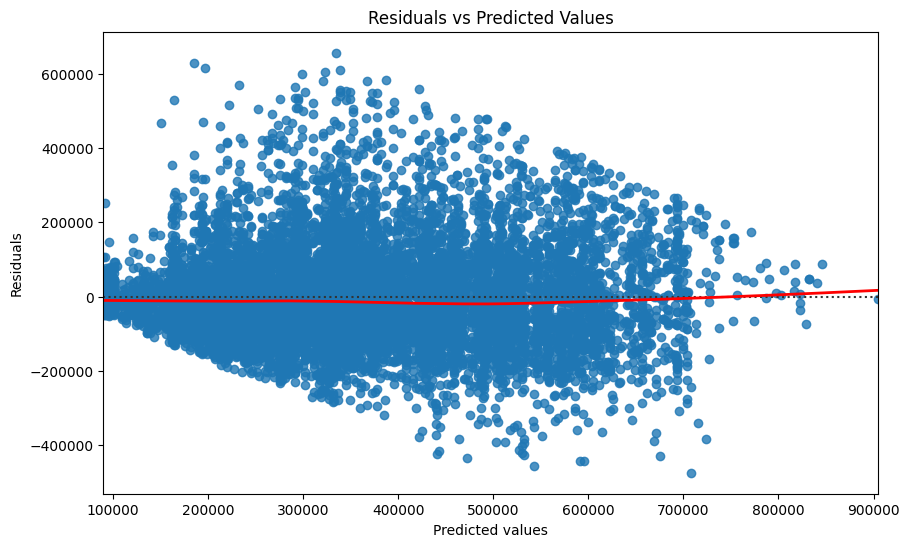

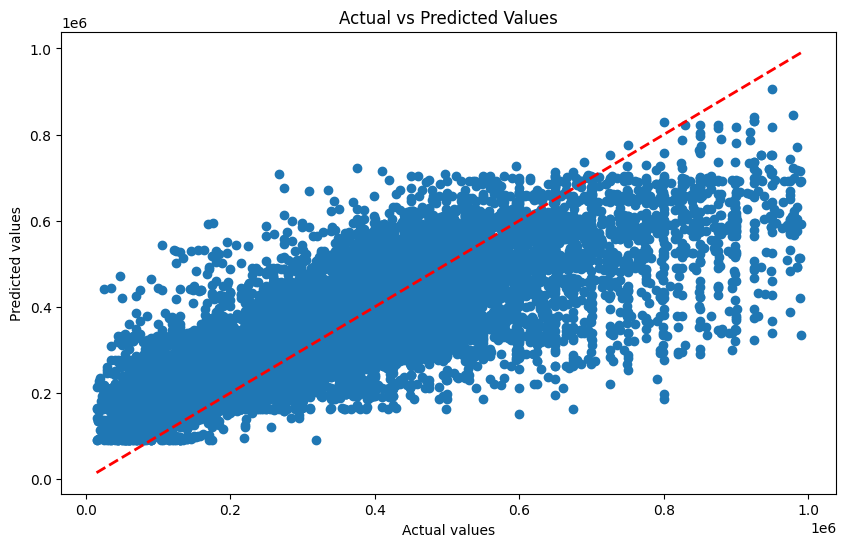

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


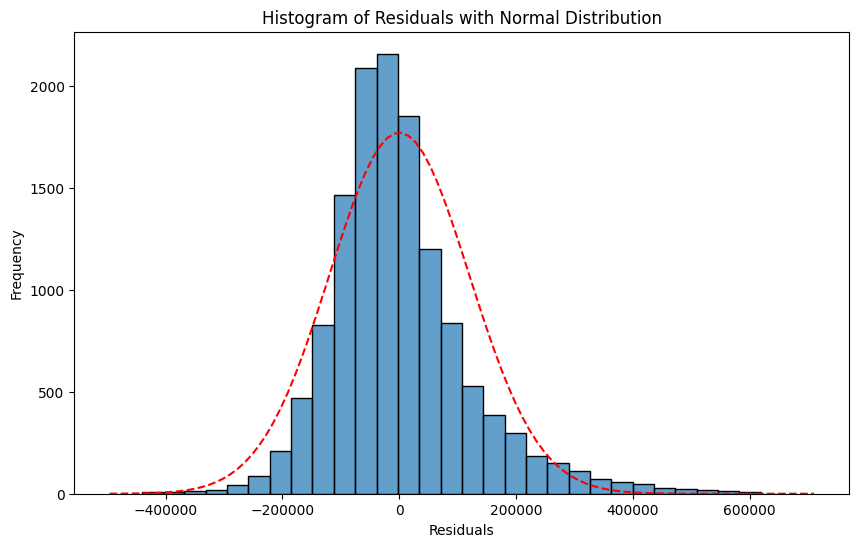

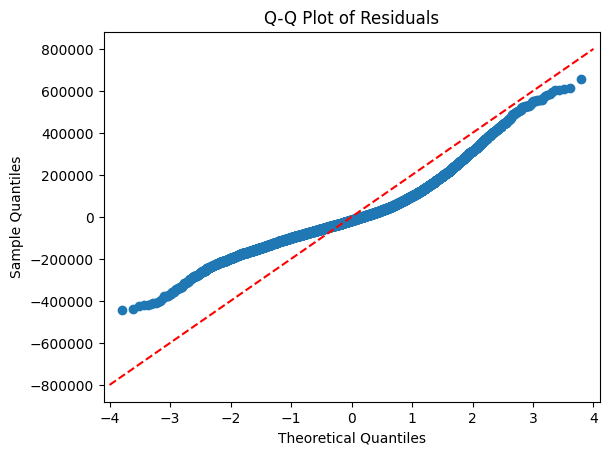

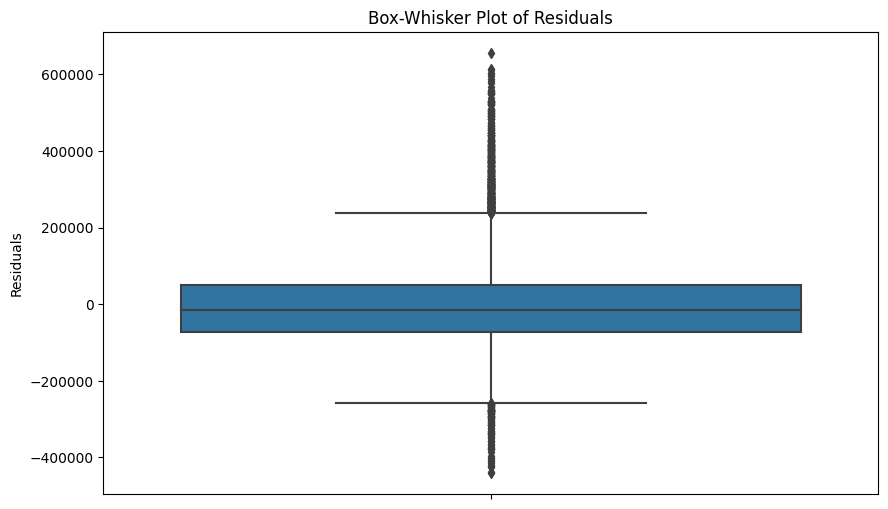

In [24]:
# Importing necessary libraries
import statsmodels.api as sm  # For statistical models and Q-Q plot
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced data visualization
import numpy as np  # For numerical operations
from scipy.stats import norm  # For normal distribution functions

# Define a function to plot residuals
def plot_residuals(y_test, y_pred):
    # Calculate residuals
    residuals = y_test - y_pred
    # Create a figure with specified size
    plt.figure(figsize=(10, 6))
    # Plot residuals with a lowess line
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
    # Set x-axis label
    plt.xlabel('Predicted values')
    # Set y-axis label
    plt.ylabel('Residuals')
    # Set plot title
    plt.title('Residuals vs Predicted Values')
    # Display the plot
    plt.show()

# Define a function to plot predicted values against actual values
def plot_prediction_vs_actual(y_test, y_pred):
    # Create a figure with specified size
    plt.figure(figsize=(10, 6))
    # Scatter plot of actual vs predicted values
    plt.scatter(y_test, y_pred)
    # Plot a reference line (45-degree line)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    # Set x-axis label
    plt.xlabel('Actual values')
    # Set y-axis label
    plt.ylabel('Predicted values')
    # Set plot title
    plt.title('Actual vs Predicted Values')
    # Display the plot
    plt.show()

# Define a function to plot a histogram of residuals
def plot_residual_histogram(y_test, y_pred):
    # Calculate residuals
    residuals = y_test - y_pred
    # Create a figure with specified size
    plt.figure(figsize=(10, 6))
    # Plot histogram of residuals
    sns.histplot(residuals, bins=30, kde=False, edgecolor='k', alpha=0.7)
    # Get current x-axis limits
    xmin, xmax = plt.xlim()
    # Generate x values for normal distribution
    x = np.linspace(xmin, xmax, 100)
    # Calculate normal distribution
    p = norm.pdf(x, np.mean(residuals), np.std(residuals))
    # Plot the normal distribution over the histogram
    plt.plot(x, p * len(residuals) * (xmax - xmin) / 30, 'r--')
    # Set x-axis label
    plt.xlabel('Residuals')
    # Set y-axis label
    plt.ylabel('Frequency')
    # Set plot title
    plt.title('Histogram of Residuals with Normal Distribution')
    # Display the plot
    plt.show()

# Define a function to plot a Q-Q plot of residuals
def plot_qq(y_test, y_pred):
    # Calculate residuals
    residuals = y_test - y_pred
    # Create a Q-Q plot
    sm.qqplot(residuals)
    # Set plot title
    plt.title('Q-Q Plot of Residuals')
    # Set x-axis limits
    plt.xlim([-4.1, 4.1])
    # Plot a reference line (45-degree line)
    plt.plot([-4, 4], [-800000, 800000], 'r--')
    # Display the plot
    plt.show()

# Define a function to plot a box-whisker plot of residuals
def plot_box_whisker(y_test, y_pred):
    # Calculate residuals
    residuals = y_test - y_pred
    # Create a figure with specified size
    plt.figure(figsize=(10, 6))
    # Plot box-whisker plot of residuals
    sns.boxplot(y=residuals)
    # Set plot title
    plt.title('Box-Whisker Plot of Residuals')
    # Set y-axis label
    plt.ylabel('Residuals')
    # Display the plot
    plt.show()

# Using these functions for our best overall model
best_model_name = 'GradientBoosting Regression'  # Define the best model's name
best_model = models[best_model_name]  # Get the best model from models dictionary
y_pred = best_model.predict(X_test)  # Predict using the best model

# Call plotting functions to visualize model performance
plot_residuals(y_test, y_pred)  # Plot residuals
plot_prediction_vs_actual(y_test, y_pred)  # Plot predicted vs actual values
plot_residual_histogram(y_test, y_pred)  # Plot residuals histogram
plot_qq(y_test, y_pred)  # Plot Q-Q plot of residuals
plot_box_whisker(y_test, y_pred)  # Plot box-whisker plot of residuals


The first plot is a Residuals vs. Predicted Values plot, which is typically used to diagnose the fit of a regression model. Here's a detailed analysis:

1. **Residuals Definition**: Residuals are the differences between the observed values and the predicted values of the model. They are calculated as \( \text{Residual} = \text{Observed} - \text{Predicted} \).

2. **Plot Interpretation**:
    - **X-axis (Predicted values)**: This axis represents the predicted values from the regression model.
    - **Y-axis (Residuals)**: This axis represents the residuals.

3. **Expected Pattern for Good Fit**:
    - The residuals should be randomly distributed around the horizontal axis (y=0).
    - There should be no clear pattern (e.g., funnel shape or curve).
    - This randomness indicates that the model's errors are normally distributed and that the model is well-fitted.

4. **Current Plot Analysis**:
    - **Randomness**: The plot shows a fairly random distribution of residuals around the zero line, but there appears to be some heteroscedasticity (non-constant variance of residuals). This is indicated by the wider spread of residuals as the predicted values increase.
    - **Funnel Shape**: There's a slight funnel shape, with residuals spreading out more as the predicted values increase. This suggests that the model might be less accurate for higher predicted values.
    - **Line of Best Fit (Red Line)**: The red line represents a smoothed trend line through the residuals. An ideal fit would have this line very close to the horizontal zero line. In this plot, the red line slightly deviates from the zero line, indicating some systematic bias in the predictions.

5. **Potential Issues and Recommendations**:
    - **Heteroscedasticity**: The increasing spread of residuals suggests heteroscedasticity. This means that the variance of the errors increases with the predicted values. This can be addressed by transforming the dependent variable (e.g., using a log transformation) or using weighted regression techniques.
    - **Model Improvements**: Consider if a more complex model might be needed to capture the relationships in the data better. Polynomial regression, interaction terms, or non-linear models might help if the relationship is non-linear.
    - **Check for Outliers**: Some points are far from the zero line, which could be outliers. Investigating and potentially removing outliers or understanding why they occur can improve model performance.

In summary, while the residuals are fairly well-distributed around zero, indicating a reasonable fit, the presence of heteroscedasticity suggests that model improvements or transformations might be necessary for more accurate predictions.

The second plot represents the comparison between actual and predicted values from a regression model. Here’s a detailed analysis:

1. **Axes:**
   - The x-axis represents the actual values, ranging approximately from 0 to \(1 \times 10^6\).
   - The y-axis represents the predicted values, also ranging approximately from 0 to \(1 \times 10^6\).

2. **Diagonal Line:**
   - The red dashed line represents the line \( y = x \). This line is where the predicted values would equal the actual values. Ideally, if the model predictions were perfect, all points would lie on this line.

3. **Data Distribution:**
   - The data points are generally scattered around the diagonal line but with a noticeable spread.
   - There is a concentration of points at lower values, indicating that the model predicts lower actual values more frequently.
   - As the actual values increase, the spread of the predicted values also increases, showing that the model’s predictions become less accurate for higher actual values.

4. **Model Performance:**
   - The plot indicates some level of correlation between actual and predicted values, but with significant variability.
   - There is a visible pattern where for lower actual values, the predictions are relatively accurate, but for higher actual values, the predictions are more dispersed and less accurate.
   - There are numerous points where the predicted values are considerably lower than the actual values, indicating underestimation by the model.
   - Similarly, there are points where the predicted values are significantly higher than the actual values, indicating overestimation.

5. **Potential Issues:**
   - The spread of points away from the diagonal line suggests that the model may have bias or variance issues.
   - The model might be suffering from heteroscedasticity, where the variability of the errors increases with the actual values.
   - The distribution suggests that the model might not be capturing the underlying relationship between the actual and predicted values effectively, especially for higher values.

6. **Improvement Suggestions:**
   - Consider investigating and potentially transforming the features or the target variable to stabilize the variance.
   - Experiment with different model types or architectures that may better capture the relationship in the data.
   - Perform residual analysis to identify patterns in the prediction errors and address potential model deficiencies.

In summary, while the model shows some level of correlation between actual and predicted values, there is significant room for improvement, particularly in reducing the spread of predictions and enhancing accuracy for higher actual values.

In the third plot, the histogram depicts the distribution of residuals (the differences between actual and predicted values) from a regression model. Here’s a detailed analysis:

1. **Residuals Distribution:**
   - The x-axis represents the residuals, ranging approximately from -600,000 to 800,000.
   - The y-axis represents the frequency of residuals within specified bins.
   - The histogram bars show the actual frequency of residuals.

2. **Normal Distribution Overlay:**
   - The red dashed line represents the normal distribution fitted to the residuals.
   - This overlay helps to assess how closely the residuals follow a normal distribution.

3. **Symmetry and Skewness:**
   - The residuals appear to be fairly symmetric around zero, with a slight skew to the right (positive residuals).
   - There are more residuals concentrated near zero, indicating many predictions are close to the actual values.
   - However, there are notable tails extending to both negative and positive sides, indicating the presence of some larger residuals (prediction errors).

4. **Kurtosis:**
   - The histogram shows a higher peak and heavier tails compared to the normal distribution, suggesting leptokurtic behavior.
   - This indicates a higher number of small and large errors compared to what is expected under a normal distribution.

5. **Model Performance Insights:**
   - The concentration of residuals around zero is a positive indicator, suggesting the model has many accurate predictions.
   - The tails and spread indicate that while many predictions are accurate, there are also significant outliers.
   - The slight positive skew suggests the model tends to overestimate more than it underestimates, but this tendency is not very strong.

6. **Potential Issues and Improvements:**
   - The presence of outliers (residuals far from zero) might indicate specific instances where the model fails to generalize well.
   - The right skew and leptokurtic nature suggest exploring transformations or more robust modeling techniques to handle extreme values.
   - Consider investigating potential heteroscedasticity (variance of residuals changing with actual values) and applying corrective measures like weighted regression if necessary.
   - Analyzing and possibly engineering features that might capture the underlying relationships better, reducing prediction errors.

In summary, while the residuals show a general pattern of being centered around zero with a normal distribution shape, the presence of significant outliers and a slight positive skew suggests that the model could benefit from further refinement to improve prediction accuracy and handle extreme values more effectively.

The Q-Q (Quantile-Quantile) plot, the fourth one, compares the quantiles of the residuals from your regression model to the quantiles of a standard normal distribution. Here's a detailed analysis of the plot:

1. **Axes:**
   - The x-axis represents the theoretical quantiles from a standard normal distribution.
   - The y-axis represents the sample quantiles of the residuals from the regression model.

2. **Diagonal Line:**
   - The red dashed line represents the line \( y = x \), where the residuals would lie if they were perfectly normally distributed.

3. **Distribution of Residuals:**
   - The plot shows that for most of the range, the residuals closely follow the diagonal line, suggesting that the central portion of the residuals is approximately normally distributed.
   - Deviations from the line are observed at the tails, indicating that the residuals deviate from normality at the extremes.

4. **Pattern in Residuals:**
   - The left tail (negative residuals) deviates below the line, and the right tail (positive residuals) deviates above the line. This pattern suggests heavier tails than a normal distribution (leptokurtic behavior), indicating the presence of outliers.
   - The S-shaped curve (concave in the center and convex at the tails) suggests that the distribution of residuals is not perfectly normal and exhibits some skewness and kurtosis.

5. **Model Performance Insights:**
   - The close alignment in the center of the plot indicates that for many predictions, the residuals behave similarly to a normal distribution.
   - The deviation at the tails confirms the presence of extreme residuals, which were also evident in the histogram.
   - This deviation suggests that while the model performs well for most cases, it struggles with certain extreme values, leading to larger errors.

6. **Potential Issues and Improvements:**
   - The deviations at the tails highlight the need to address the outliers or extreme values in the data.
   - Possible improvements include transforming the target variable to stabilize variance and reduce the impact of outliers.
   - Another approach is to use more robust regression techniques that can handle heavy-tailed distributions better.
   - Additionally, further feature engineering or incorporating additional relevant features might help in capturing the underlying relationships more accurately, reducing extreme residuals.

In summary, the Q-Q plot shows that while the residuals are approximately normally distributed in the central range, there are significant deviations at the tails, indicating outliers and suggesting that the model can be further refined to handle extreme values more effectively.

Finally, the box-whisker plot (also known as a box plot) of residuals provides a visual representation of the distribution of residuals in your regression model. Here's a breakdown of the key components and what they signify:

1. **Box**: The box represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). It shows where the middle 50% of the data points lie.
   - **Median Line**: The line inside the box represents the median (Q2) of the residuals. It is the value separating the higher half from the lower half of the residuals.

2. **Whiskers**: The lines extending from the box represent the range of the residuals within 1.5 times the IQR from the quartiles. 
   - **Lower Whisker**: Extends from Q1 to the smallest value within 1.5 * IQR below Q1.
   - **Upper Whisker**: Extends from Q3 to the largest value within 1.5 * IQR above Q3.

3. **Outliers**: The points outside the whiskers are considered outliers. These are residuals that are unusually high or low compared to the rest of the data.
   - **Upper Outliers**: Data points above the upper whisker.
   - **Lower Outliers**: Data points below the lower whisker.

**Analysis:**

- **Symmetry**: Ideally, for a well-behaved regression model, residuals should be symmetrically distributed around zero. If the box plot is symmetrical and centered around zero, it suggests that the residuals are evenly distributed.
- **Spread**: The spread of the residuals indicates the variability in the data. A large spread suggests high variability, while a small spread indicates low variability.
- **Outliers**: The presence of many outliers, especially extreme ones, can indicate potential issues with the model or the data. It might be worthwhile to investigate these outliers to understand why they deviate significantly from the rest of the residuals.

In this plot, it appears that there are numerous outliers, particularly on the higher end of the residuals, suggesting that there may be some data points that do not fit well with the model. This could be due to various factors such as heteroscedasticity, non-linearity, or the presence of influential points. Further investigation and potential model refinement might be necessary to address these issues.